# Kapazität des AWGN-Kanals  

## Kanalkapazität

Bei der Übertragung über einen AWGN-Kanal wird das Informationssignal $x$ durch weißes, gaußverteiltes Rauschen $n$ überlagert, es gilt $y=x+n$. Die Transinformation erhält man gemäß Definition aus der Differenz der differentiellen Entropien

\begin{align}
    I({\cal X};{\cal Y}) &= h({\cal Y}) - h({\cal Y} \mid {\cal X}) \; .
\end{align}

Der Term $h({\cal Y} \mid {\cal X})$ entspricht der differentiellen Entropie $h({\cal N})$ des Rauschens und ist bei gegebener Rauschleistung konstant. Für den reellwertigen Fall gilt

\begin{align}
    h({\cal Y} \mid {\cal X}) = h({\cal N}) = \frac{1}{2} \cdot \log_2(2 \pi e \sigma_{\cal X}^2)\; .
\end{align}

Da $\cal X$ und $\cal N$ statistisch unabhängige Prozesse sind, addieren sich ihre Leistungen und wir erhalten

\begin{align}
    \sigma_{\cal Y}^2 = \sigma_{\cal X}^2 + \sigma_{\cal N}^2 \; .
\end{align}

Es stellt sich nun die Frage, mit welcher Eingangsverteilung $p_{\cal X}(x)$ die Transinformation maximiert wird, um die Kanalkapazität zu erhalten. Da $h({\cal Y} \mid {\cal X})=h({\cal N})$ konstant ist, muss $h({\cal Y})$ maximiert werden. Für die gegebene Leistung $\sigma_{\cal Y}^2$ wird die differentielle Entropie maximiert, wenn $\cal Y$ gaußvereilt ist. Dies ist aber nur der Fall, wenn auch der Prozess $\cal X$ gaußverteilt ist. Somit wird die Kapazität eines AWGN-Kanals für ein gaußverteiltes Eingangssignal erreicht. Sie lautet

\begin{align}
    C &= h({\cal Y}) - h({\cal Y} \mid {\cal X}) \\
      &= \frac{1}{2} \cdot \log_2(2 \pi e \sigma_{\cal Y}^2) 
       - \frac{1}{2} \cdot \log_2(2 \pi e \sigma_{\cal N}^2) \\
      &= \frac{1}{2} \cdot \log_2 \left( \frac{2 \pi e (\sigma_{\cal X}^2+\sigma_{\cal N}^2)}
                                              {2 \pi e \sigma_{\cal N}^2} \right) \\
      &= \frac{1}{2} \cdot \log_2 \left( 1 + \frac{\sigma_{\cal X}^2}{\sigma_{\cal N}^2} \right)
\end{align}

Wir erkennen das die Kanalkapazität des AWGN-Kanals nur vom Signalrauschverhältnis $\frac{\sigma_{\cal X}^2}{\sigma_{\cal N}^2}$ abhängt.


Für komplexwertige Signale wie im äquivalenten Basisband üblich lässt sich die obige Herleitung genauso durchführen. Es ist lediglich zu beachten, dass $h({\cal Y}) = \log_2(\pi e \sigma_{\cal Y}^2)$ gilt, woraus sich die Kanalkapazität

\begin{align}
    C &= h({\cal Y}) - h({\cal Y} \mid {\cal X}) 
       = \log_2(\pi e \sigma_{\cal Y}^2) - \log_2(\pi e \sigma_{\cal N}^2) \\
      &= \log_2 \left( 1 + \frac{\sigma_{\cal X}^2}{\sigma_{\cal N}^2} \right)
\end{align}

ergibt. Wir erkennen, dass gegenüber dem reellen Fall der Faktor $\frac{1}{2}$ vor dem Logarithmus fehlt. Dies resultiert aus der Nutzung von zwei unabhängigen Komponenten, nämlich Real- und Imaginärteil.

Die Einheit der Kapazität $C$ ist bit/s/Hz, also eine auf die Bandbreite normierte Datenrate. Man spricht daher auch von spektraler Effizienz.

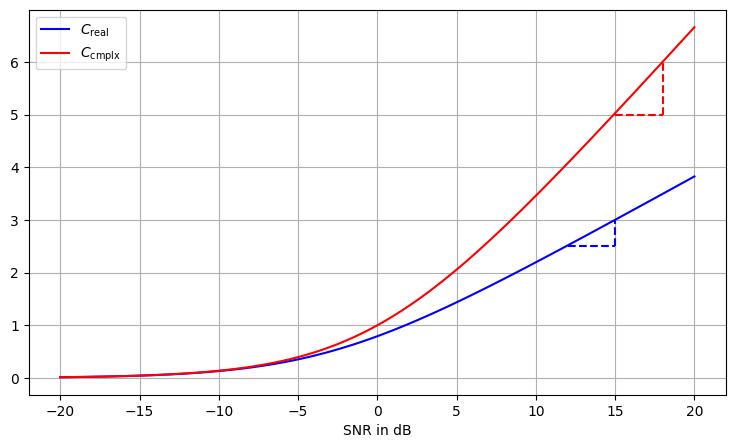

In [7]:
import numpy as np
from scipy import special as sp
import matplotlib.pyplot as plt

SNRdB = np.linspace(-20,20,101)
SNR = 10**(SNRdB/10)

Cgauss_real = 0.5 * np.log2(1+2*SNR)
Cgauss_cmplx = np.log2(1+SNR)

fig1 = plt.figure(figsize=(9,5))
ax1 = fig1.add_subplot(111)
ax1.plot(SNRdB, Cgauss_real, 'b-', label='$C_{\mathrm{real}}$')
ax1.plot(([12,15],[15,15]), ([2.5,2.5],[2.5,3]), 'b--')
ax1.plot(SNRdB, Cgauss_cmplx, 'r-', label='$C_{\mathrm{cmplx}}$')
ax1.plot(([15,18],[18,18]), ([5,5],[5,6]), 'r--')
plt.legend()
plt.xlabel('SNR in dB')
plt.grid()


Im obigen Bild ist zu beachten, dass das SNR logarithmisch aufgetragen ist. Für großes SNR sind die Verläufe der Kapazitäten für den reellen wie auch den komplexen Fall nahezu linear. Dies bedeutet, dass für einen linearen Anstieg der spektralen Effizienz (Datenrate) ein exponentieller Anstieg des SNRs und damit der Sendeleistung erforderlich ist. In diesem SNR-Bereich verdoppelt sich bei der roten Kurve die Sendeleistung (+3dB) für die Erhöhung der spektralen Effizienz um 1 bit/s/Hz. Für eine rein reellwertige Übertragung steigt die Effizienz wegen der ausschließlichen Nutzung der Inphasen-Komponente um lediglich 0.5 bit/s/Hz. Die Erhöhung der Datenrate über die Sendeleistung ist daher sehr teuer.

## Energieeffizienz

Die Sendeleistung kann durch 

\begin{equation}
    \sigma_{\cal X}^2 = \frac{E_{\mathrm{s}}}{T_{\mathrm{S}}} = E_{\mathrm{s}} B
\end{equation}

dargestellt werden, wobei $E_{\mathrm{s}}$ die mittlere Symbolenergie, $T_{\mathrm{S}}$ die Symboldauer und $B$ die HF-Bandbreite darstellen. Für die Rauschleistung gilt entsprechend

\begin{equation}
    \sigma_{\cal N}^2 = N_0 B \; .
\end{equation}

Für reellwertige Modulationsverfahren wie die ASK wird die Sendeleistung ausschließlich in den Realteil gegeben, der Imaginärteil des Rauschens stört die Übertragung nicht. Damit wird die Übertragung nur durch die halbe Rauschleistung beeinfluss und für das Signalrauschverhältnis sowie die Kanalkapazität gilt

\begin{equation}
    \gamma_{\mathrm{real}}
    = \frac{\sigma_{\cal X}^2}{\sigma_{{\cal N}'}^2} 
    = \frac{E_{\mathrm{s}} B}{N_0 / 2 B} = \frac{E_{\mathrm{s}} / N_0}{2} 
    \qquad \Rightarrow \qquad
    C_{\mathrm{real}} = \frac{1}{2} \cdot \log_2 \left(1 + 2 \frac{E_{\mathrm{s}}}{N_0} \right) \; .
\end{equation}

Bei komplexwertigen Modulationsverahren verteilen sich die Leistungen von Signal und Rauschen gleichmäßig auf Real- und Imaginärteil, so dass

\begin{equation}
    \gamma_{\mathrm{cmplx}} = \frac{\sigma_{\cal X}^2}{\sigma_{\cal N}^2} 
    = \frac{E_{\mathrm{s}} B}{N_0 B} = \frac{E_{\mathrm{s}}}{N_0}
    \qquad \Rightarrow \qquad
    C_{\mathrm{cmplx}} = \log_2 \left(1 + \frac{E_{\mathrm{s}}}{N_0} \right) 
\end{equation}

folgt. Der Nachteil eines halbierten SNRs für komplexwertige Modulationsverfahren wird durch den Vorteilteil überkompensiert, dass gleichzeitig zwei Datenströme (Inphase- und Quadraturkomponente) übertragen werden können. Der fehlende Faktor $\frac{1}{2}$ vor dem Logarithmus wirkt sich stärker aus als der Faktor $2$ im Logarithmus.

Eine wichtige Größe in der Informationstheorie ist die pro Informationsbit aufgebrachte Energie $E_{\mathrm{b}}$. Es gilt $E_{\mathrm{b}}=C \cdot E_{\mathrm{s}}$, woraus für den komplexwertigen Fall

\begin{equation}
    C = \log_2 \left(1 + C \cdot \frac{E_{\mathrm{b}}}{N_0} \right) 
\end{equation}

folgt. Diese implizite Gleichung lässt sich nach $\frac{E_{\mathrm{b}}}{N_0}$ auflösen. 

\begin{equation}
    \frac{E_{\mathrm{b}}}{N_0} = \frac{2^C -1}{C}
\end{equation}

Man könnte vermuten, dass die Kapazität erst für sehr kleine SNR gegen Null geht. Der Grenzübergang $C \to 0$ offenbart aber, dass es einen postiven endlichen Wert für $\frac{E_b}{N_0}$ gibt, unterhalb dem keine Übertragung mehr möglich ist, also $C=0$ gilt. Mit der Regel nach L'Hospital erhalten wir

\begin{equation}
    \lim_{C \to 0} \frac{E_{\mathrm{b}}}{N_0} = \lim_{C \to 0} \frac{2^C -1}{C} = \mathrm{ln}(2) \to -1.59 \text{ dB} .
\end{equation}

Die Energie je Informationsbit bezogen auf die spektrale Rauschleistungsdichte darf also nicht kleiner als $\mathrm{ln}(2)$ werden. Das erforderliche Verhältnis $\frac{E_{\mathrm{b}}}{N_0}$ für konkrete Übertragungsverfahren wird auch als Energieeffizienz bezeichnet.

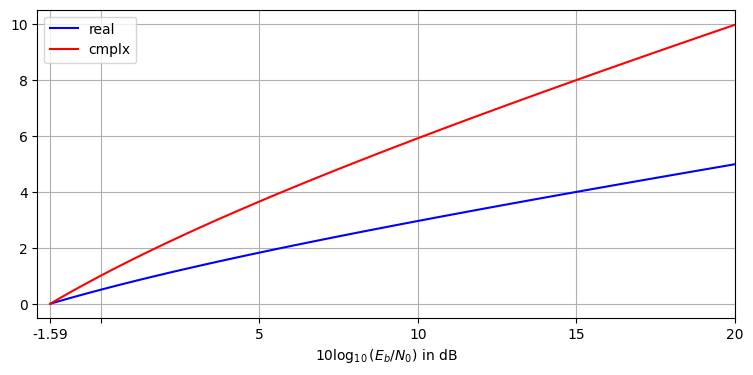

In [8]:
C = np.linspace(1e-10,10,101)
EbN0 = (2**(2*C)-1)/(2*C)
EbN0dB = 10*np.log10(EbN0)
EbN0_cmplx = (2**C-1)/C
EbN0dB_cmplx = 10*np.log10(EbN0_cmplx)

fig2 = plt.figure(figsize=(9,4))
ax2 = fig2.add_subplot(111)
ax2.plot(EbN0dB, C, 'b-', label='real')
ax2.plot(EbN0dB_cmplx, C, 'r-', label='cmplx')
plt.xlabel('$10 \log_{10}(E_b/N_0)$ in dB')
plt.xticks(np.append(-1.59,np.arange(0,21,5)))
ax2.set_xticklabels(['-1.59','','5','10','15','20'])
plt.xlim(-2,20)
plt.grid()
plt.legend()

Das obige Bild zeigt, dass sowohl für die komplexwertige als auch die reellwertige Übertragung der gleiche Grenzwert von $10 \cdot \log_{10} \frac{E_{\mathrm{b}}}{N_0} > -1.59$ dB gilt.

## Zeitkontinuierlicher AWGN-Kanal

Bezieht man Sende- und Empfangsfilter in die Betrachtung mit ein, kann ein Zusammenhang zwischen der spektralen Effizienz (auf die Bandbreite bezogene Datenrate) und der wirklichen Datenrate gemessen in bit/s hergestellt werden. Wir gehen im Folgenden vom idealen Tiefpass für Sende- und Empfangsfilter aus, d.h. es gilt $T_{\mathrm{s}}^{-1} = 2 f_{\mathrm{N}} = B$. Beim idealen Tiefpass entspricht die HF-Bandbreite $B$ also der Symbolrate $T_{\mathrm{s}}^{-1} = 2 f_{\mathrm{N}}$. 

Pro Symboldauer $T_{\mathrm{s}}$ wird ein Datensymbol mit dem Informationsgehalt $C$ gesendet. Der maximale Informationsfluss gemessen in bit/s beträgt demnach

\begin{equation}
    C_{\mathrm{T}} 
    = \frac{C}{T_{\mathrm{s}}} 
    = C \cdot B = C \cdot \log_2 \left( 1 + \frac{\sigma_{\cal X}^2}{\sigma_{\cal N}^2} \right) \; .
\end{equation}

Offensichtlich steigt die maximal mögliche Informationsrate $C_{\mathrm{T}}$ bei festem SNR linear mit der Bandbreite $B$ an. Wenn man bei fester Sendeleistung $\sigma_{\cal X}^2=\mathrm{const.}$ die Bandbreite gegen unendlich laufen lässt, ergibt sich hingegen folgender Grenzwert.

\begin{equation}
    C_{\mathrm{T}} 
    = C \cdot \log_2 \left( 1 + \frac{\sigma_{\cal X}^2}{B \cdot N_0} \right) 
    \quad \xrightarrow [B \to \infty]{} \quad
    \frac{\sigma_{\cal X}^2}{N_0} \cdot \log_2(e)    
\end{equation}

Erstaunlicherweise steigt die erzielbare Informationsrate bei konstanter Ssendeleistung nicht beliebig mit der Bandbreite an, sondern strebt gegen einen endlichen Wert. Für das in dem unten dargestellten Diagram beträgt der asymptotische Grenzwert $\frac{\sigma_{\cal X}^2}{N_0} \cdot \log_2(e) = 5 \cdot \log_2(e) = 7.21$ bit/s. Der Grund für diese Sättigung beruht auf der Tatsache, dass die Energie pro Datensymbol $E_{\mathrm{s}}=\frac{\sigma_{\cal X}^2}{B}$ für $B \to \infty$ gegen Null strebt. Wie schon in den Kapazitätsformeln mit $\frac{E_{\mathrm{s}}}{N_0}$ bzw. $\frac{E_{\mathrm{b}}}{N_0}$ erkennbar kommt es auf die pro Symbol bzw. Informationsbit spendierte Energie bezogen auf die spektrale Rauschleistungsdichte $N_0$ an, nicht auf die absolute Sendeleistung.

Text(0.5, 1.0, 'Informationsfluss für $\\sigma_{\\cal X}^2/N_0=$5.0')

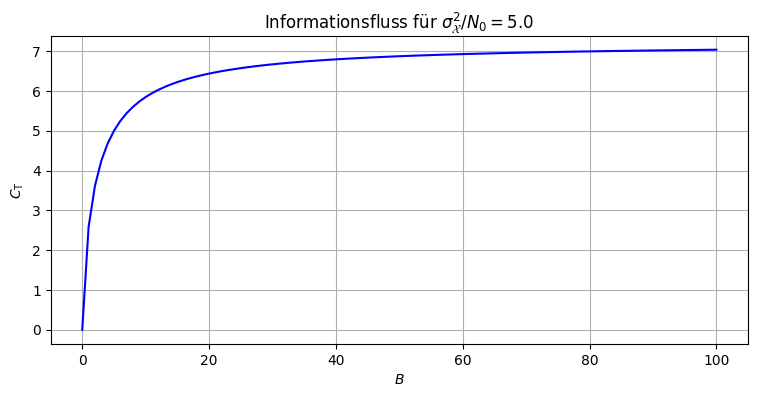

In [9]:
sigma2X_N0 = 5.0
B = np.linspace(1e-10,100,101)
CT = B * np.log2( 1 + sigma2X_N0 / B )

fig3 = plt.figure(figsize=(9,4))
ax3 = fig3.add_subplot(111)
ax3.plot(B, CT, 'b-')
plt.xlabel('$B$')
plt.ylabel('$C_{\mathrm{T}}$')
plt.grid()
plt.title('Informationsfluss für $\sigma_{\cal X}^2/N_0=$%1.1f' %(sigma2X_N0))